In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

## Import Dataset and Preprocessing

#### Cab_Data.csv – this file includes details of transaction for 2 cab companies

In [3]:
cab_raw = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv")

In [4]:
cab_raw.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
cab_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [6]:
#convert datetype
cab_raw['Date of Travel'] = pd.TimedeltaIndex(cab_raw['Date of Travel'], unit = 'd') + dt.datetime(1900,1,1)

In [7]:
#check again
cab_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [8]:
cab_raw.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776


#### Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

In [9]:
customer_raw = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv")

In [10]:
customer_raw.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [11]:
customer_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


#### Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

In [12]:
transaction_raw = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv")

In [13]:
transaction_raw.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [14]:
transaction_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


#### City.csv – this file contains list of US cities, their population and number of cab users

In [15]:
city_raw = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv")

In [16]:
city_raw.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [17]:
city_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


#### Merge transaction and customer info

In [18]:
transaction = pd.merge(transaction_raw, customer_raw)

In [19]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


#### merge cab data and transaction

In [20]:
travel = pd.merge(cab_raw, transaction)

In [21]:
travel.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


#### merge travel data with city

In [22]:
df = pd.merge(travel, city_raw)

In [23]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


### Data Preprocessing

#### Check duplicates

In [24]:
len(df)

359392

In [25]:
df.shape

(359392, 14)

In [26]:
len(df.drop_duplicates())

359392

no dupliactes

#### Check missing values

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

no missing values

#### Check outliers

In [28]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


In [29]:
df['Customer ID'].sort_values()

226640        1
183490        1
233868        1
214784        1
240914        1
          ...  
39167     60000
28107     60000
16999     60000
41299     60000
29743     60000
Name: Customer ID, Length: 359392, dtype: int64

In [30]:
df['Price Charged'].sort_values()

165271      15.60
273921      15.75
13977       16.38
101368      16.53
104393      16.76
           ...   
204174    1981.05
273923    1993.83
204392    2013.95
204295    2016.70
204270    2048.03
Name: Price Charged, Length: 359392, dtype: float64

In [31]:
print(df[df['Price Charged'] > 1800])

        Transaction ID Date of Travel     Company            City  \
169052        10010287     2016-02-16  Yellow Cab     NEW YORK NY   
171720        10025091     2016-04-11  Yellow Cab     NEW YORK NY   
173146        10031184     2016-05-03  Yellow Cab     NEW YORK NY   
173983        10035372     2016-05-16  Yellow Cab     NEW YORK NY   
175951        10046260     2016-06-21  Yellow Cab     NEW YORK NY   
176478        10048604     2016-06-28  Yellow Cab     NEW YORK NY   
198719        10140740     2017-01-24  Yellow Cab     NEW YORK NY   
199595        10146396     2017-02-14  Yellow Cab     NEW YORK NY   
200590        10150817     2017-02-28  Yellow Cab     NEW YORK NY   
201213        10154873     2017-03-14  Yellow Cab     NEW YORK NY   
201488        10155148     2017-03-14  Yellow Cab     NEW YORK NY   
202789        10161887     2017-04-04  Yellow Cab     NEW YORK NY   
203379        10166110     2017-04-18  Yellow Cab     NEW YORK NY   
203557        10166288     2017-04

seems no outliers, all data is resonable

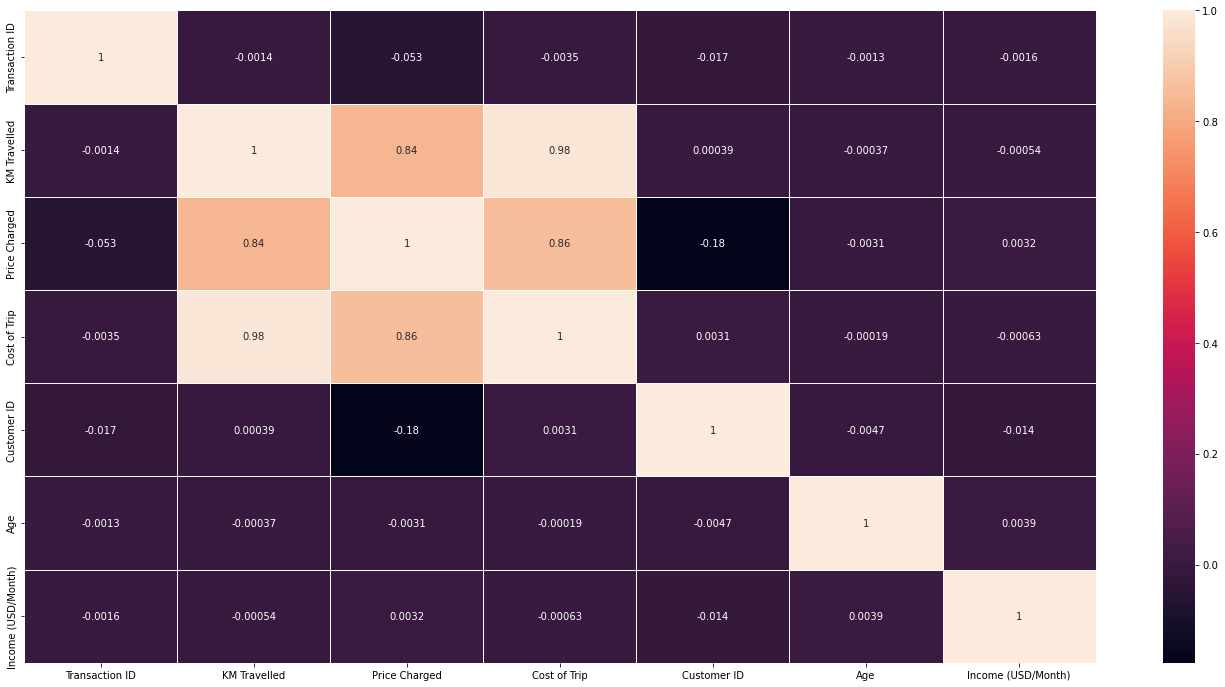

In [32]:
#correlations
plt.figure(figsize = (24, 12))
sns.heatmap(df.corr(), annot = True, linewidths = 1)
plt.show()

## EDA

In [33]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


#### Customers in each company

In [34]:
pd.DataFrame(df.groupby('Company')['Customer ID'].count())

,Customer ID
Company,
Pink Cab,84711
Yellow Cab,274681


From only the number of customers, the customers regestered in Yellow Cab is much more than Pink Cab

Then let's check if the price/cost, customer segment (income, city, age, gender) and dates have any influences on the overall populations

In [35]:
#profit
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",57.315
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",23.666
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",27.568
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",25.798
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701",16.844


<AxesSubplot:>

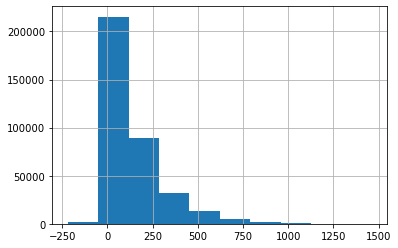

In [36]:
df['Profit'].hist()

In [37]:
#why negetive?
df[df['Profit'] < 0]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
150,10009063,2016-02-23,Pink Cab,ATLANTA GA,6.78,65.70,77.2920,29525,Card,Female,20,7199,"814,885","24,701",-11.5920
152,10009065,2016-02-22,Pink Cab,ATLANTA GA,4.48,47.93,48.8320,28136,Cash,Male,35,21085,"814,885","24,701",-0.9020
153,10009066,2016-02-15,Pink Cab,ATLANTA GA,28.75,316.44,319.1250,28685,Cash,Female,28,2931,"814,885","24,701",-2.6850
154,10009067,2016-02-21,Pink Cab,ATLANTA GA,25.96,243.70,267.3880,27280,Cash,Male,62,2373,"814,885","24,701",-23.6880
155,10009068,2016-02-22,Pink Cab,ATLANTA GA,7.49,68.80,79.3940,29924,Card,Male,42,10526,"814,885","24,701",-10.5940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359348,10440058,2018-01-07,Yellow Cab,WASHINGTON DC,32.70,442.83,443.4120,52288,Cash,Male,64,14903,"418,859","127,001",-0.5820
359364,10440076,2018-01-09,Yellow Cab,WASHINGTON DC,8.19,113.32,114.9876,53475,Card,Female,36,18038,"418,859","127,001",-1.6676
359367,10440080,2018-01-09,Yellow Cab,WASHINGTON DC,5.55,78.43,78.5880,53147,Card,Male,22,11254,"418,859","127,001",-0.1580
359374,10440087,2018-01-08,Yellow Cab,WASHINGTON DC,47.20,653.09,668.3520,52010,Card,Male,19,23602,"418,859","127,001",-15.2620


#check year wise

In [38]:
df['Year'] = pd.DatetimeIndex(df['Date of Travel']).year

In [39]:
#df['Year'] = df['Year'].astype("O")
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",57.315,2016
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",23.666,2016
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",27.568,2016
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",25.798,2016
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701",16.844,2016


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [41]:
pd.DataFrame(df.groupby('Company')['Profit'].sum())

,Profit
Company,
Pink Cab,5.307328e+06
Yellow Cab,4.402037e+07


In [42]:
pd.DataFrame(df.groupby(['Company', 'Year'])['Profit'].sum())

Profit
Company    Year              
Pink Cab   2016  1.686458e+06
           2017  2.033435e+06
           2018  1.578972e+06
           2019  8.463212e+03
Yellow Cab 2016  1.378694e+07
           2017  1.658661e+07
           2018  1.360946e+07
           2019  3.736168e+04

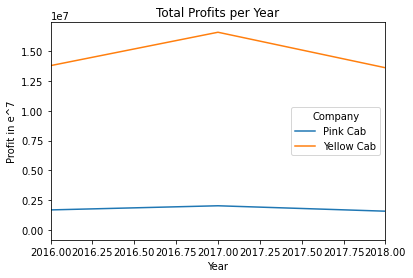

In [77]:
df.groupby(['Year', 'Company'])['Profit'].sum().unstack().plot()
plt.xlim(2016,2018)
plt.xlabel("Year")
plt.ylabel("Profit in e^7")
plt.title('Total Profits per Year')
plt.show()

Company     Year
Pink Cab    2016     67.892815
            2017     67.107856
            2018     53.604443
            2019     74.238702
Yellow Cab  2016    169.374758
            2017    168.885819
            2018    143.755337
            2019     93.638292
Name: Profit, dtype: float64


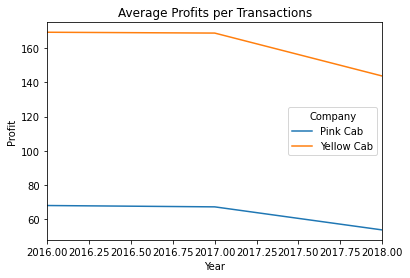

In [78]:
#average profits per transaction
print(df.groupby(['Company', 'Year'])['Profit'].mean())

df.groupby(['Year', 'Company'])['Profit'].mean().unstack().plot()
plt.xlabel("Year")
plt.xlim(2016,2018)
plt.ylabel("Profit")
plt.title('Average Profits per Transactions')
plt.show()

Company     Year
Pink Cab    2016    3.010937
            2017    2.961975
            2018    2.367763
            2019    3.108084
Yellow Cab  2016    7.490667
            2017    7.496330
            2018    6.379734
            2019    4.536079
Name: pro_km, dtype: float64


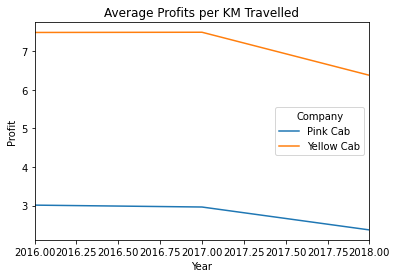

In [79]:
#Average Profits per kM
df['pro_km'] = df['Profit']/df['KM Travelled']

print(df.groupby(['Company', 'Year'])['pro_km'].mean())

df.groupby(['Year', 'Company'])['pro_km'].mean().unstack().plot()
plt.xlabel("Year")
plt.xlim(2016,2018)
plt.ylabel("Profit")
plt.title('Average Profits per KM Travelled')
plt.show()

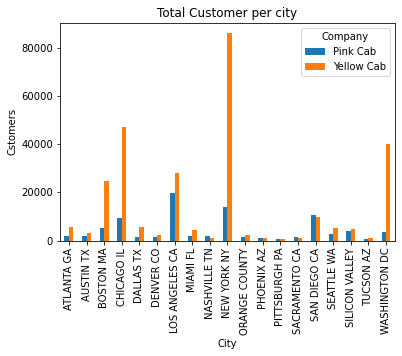

In [75]:
#Total customers per city

city = pd.DataFrame(df.groupby(['City','Company'])['Customer ID'].count().unstack())

city.plot(kind = 'bar')
plt.xlabel("City")
plt.ylabel("Cstomers")
plt.title('Total Customer per city')
plt.show()

#### Based on customer segment

In [47]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year,pro_km
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",57.315,2016,1.882266
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",23.666,2016,0.826904
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",27.568,2016,3.049558
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",25.798,2016,0.777751
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701",16.844,2016,1.929439


In [48]:
gender = pd.DataFrame(df.groupby(['Year','Company','Gender'])['Profit'].mean().unstack())
gender

Gender               Female        Male
Year Company                           
2016 Pink Cab     67.354586   68.304536
     Yellow Cab  164.877276  172.521840
2017 Pink Cab     66.543021   67.559777
     Yellow Cab  165.312089  171.534092
2018 Pink Cab     53.483163   53.702842
     Yellow Cab  140.158670  146.446991
2019 Pink Cab     67.979904   79.488016
     Yellow Cab   99.117590   89.774684

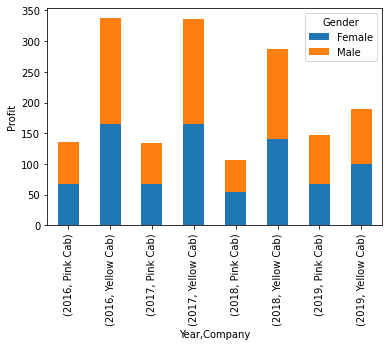

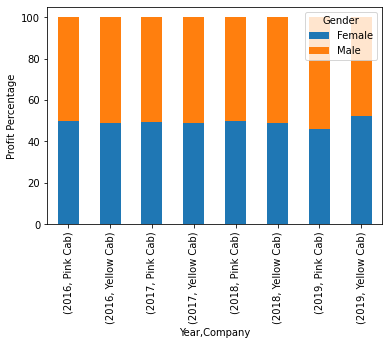

In [49]:
gender.plot(kind = 'bar', stacked = True)
plt.ylabel("Profit")
plt.show()

stacked_gender = gender.apply(lambda x: x*100/sum(x), axis=1)
stacked_gender.plot(kind = 'bar', stacked = True)
plt.ylabel("Profit Percentage")
plt.show() #approximcately 1:1

In [50]:
#age wise
df['Age'].describe()

count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64

In [51]:
age_bins = [18,25,40,60,80]
age_labels = ['18-25', '26-40','41-60','>60']

df["AgeGroup"] = pd.cut(df['Age'], age_bins, labels = age_labels)
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year,pro_km,AgeGroup
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",57.315,2016,1.882266,26-40
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",23.666,2016,0.826904,26-40
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",27.568,2016,3.049558,41-60
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",25.798,2016,0.777751,18-25
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701",16.844,2016,1.929439,26-40


In [71]:
age = pd.DataFrame(df.groupby(['Year','Company','AgeGroup'])['Profit'].sum().unstack())
age

AgeGroup                18-25         26-40         41-60          >60
Year Company                                                          
2016 Pink Cab    3.814065e+05  8.000694e+05  3.586763e+05   93450.8720
     Yellow Cab  3.140509e+06  6.561586e+06  2.984192e+06  678570.4356
2017 Pink Cab    4.795342e+05  9.488755e+05  4.313341e+05  104574.7970
     Yellow Cab  3.807134e+06  7.793331e+06  3.625787e+06  837059.4036
2018 Pink Cab    3.754889e+05  7.481553e+05  3.286881e+05   82337.5820
     Yellow Cab  3.145177e+06  6.402831e+06  2.987846e+06  676335.4320
2019 Pink Cab    1.682817e+03  3.826178e+03  2.438161e+03     231.3620
     Yellow Cab  8.001757e+03  1.923727e+04  7.844411e+03     978.1912

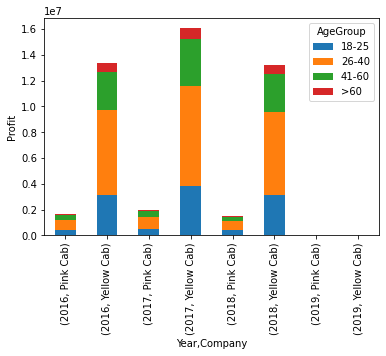

In [72]:
age.plot(kind = 'bar', stacked = True)
plt.ylabel("Profit")
plt.show() 

In [67]:
seg_age = pd.DataFrame(df.groupby(['Year','Company','AgeGroup'])['Customer ID'].count().unstack())
seg_age

AgeGroup         18-25  26-40  41-60   >60
Year Company                              
2016 Pink Cab     5627  11780   5288  1373
     Yellow Cab  18593  38667  17519  4262
2017 Pink Cab     7018  14235   6400  1613
     Yellow Cab  22565  46195  21337  5105
2018 Pink Cab     6772  13925   6299  1596
     Yellow Cab  21808  44755  20377  4941
2019 Pink Cab       27     49     29     4
     Yellow Cab     88    188     94    17

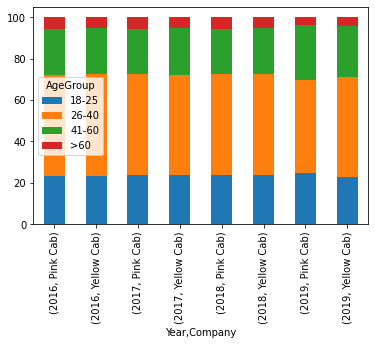

In [70]:
seg_age_stack = seg_age.apply(lambda x:x*100/sum(x), axis=1)
seg_age_stack.plot(kind = 'bar', stacked = True)
plt.show()

In [55]:
df.groupby(['Year'])['AgeGroup'].count()

Year
2016    103109
2017    124468
2018    120473
2019       496
Name: AgeGroup, dtype: int64

in 2019, the total numberof customers decreased a lot, but the profit in pink Cab increased instead

And gender and age groups did not chance a lot, show similar trends

In [56]:
#Income wise

df['Income (USD/Month)'].describe()

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64

In [57]:
income_bins = [0, 4350, 13050, 100000]
income_labels = ['Low Income', 'Middle Income', 'Upper Income']

df["IncomeGroup"] = pd.cut(df['Income (USD/Month)'], income_bins, labels = income_labels)
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year,pro_km,AgeGroup,IncomeGroup
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",57.315,2016,1.882266,26-40,Middle Income
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",23.666,2016,0.826904,26-40,Middle Income
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",27.568,2016,3.049558,41-60,Middle Income
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",25.798,2016,0.777751,18-25,Upper Income
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701",16.844,2016,1.929439,26-40,Middle Income


In [58]:
income = pd.DataFrame(df.groupby(['Year','Company','IncomeGroup'])['Profit'].sum().unstack())
income

IncomeGroup        Low Income  Middle Income  Upper Income
Year Company                                              
2016 Pink Cab    1.536282e+05   5.525421e+05  9.802872e+05
     Yellow Cab  1.289089e+06   4.616451e+06  7.881396e+06
2017 Pink Cab    1.943518e+05   6.881100e+05  1.150973e+06
     Yellow Cab  1.539685e+06   5.576487e+06  9.470442e+06
2018 Pink Cab    1.485683e+05   5.425689e+05  8.878353e+05
     Yellow Cab  1.251183e+06   4.591826e+06  7.766453e+06
2019 Pink Cab    6.071400e+02   2.702855e+03  5.153217e+03
     Yellow Cab  5.071694e+03   1.310417e+04  1.918582e+04

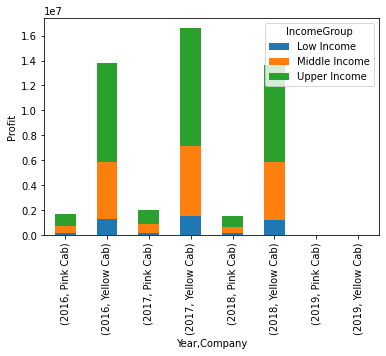

In [59]:
income.plot(kind = 'bar', stacked = True)
plt.ylabel("Profit")
plt.show() 

In [60]:
seg_income = pd.DataFrame(df.groupby(['Company','IncomeGroup'])['Customer ID'].count().unstack())
seg_income_percentile = seg_income.apply(lambda x: x*100/sum(x), axis=1)
seg_income_percentile

IncomeGroup,Low Income,Middle Income,Upper Income
Company,,,
Pink Cab,9.408459,33.846844,56.744697
Yellow Cab,9.365773,34.116302,56.517924


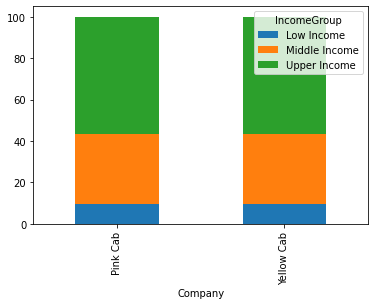

In [61]:
seg_income_percentile.plot(kind = 'bar', stacked = True)
plt.show()

upper age adults is majority and similar percentile in two company, they yield majority profit in company as well